## Теория вероятностей и математическая статистика

## Задание №1
#### Основные понятия математической статистики. Вариационный ряд. Эмпирическая  функция распределения.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import pandas as pd


def gen_sample(n):
    a = -4
    b = 2
    xlist = []
    for i in range(n):
        e = random.uniform(0, 1)
        xlist.append(e * (b - a) + a)
    ylist = [x ** (1/3) if x >= 0 else -(-x)**(1/3)for x in xlist ]
    ylist.sort()
    return ylist


def get_segments(n):
    M = 0
    if n <= 100:
        M = int(math.sqrt(n))
    else:
        M = int(2.37*math.log(n))
    return M

In [2]:
n = int(input())
d = gen_sample(n)
print(d)

10
[-1.5634652111626322, -1.55558424353981, -1.5102468698956402, -1.407471381784095, -1.2380377941706844, -1.1591203258078382, -1.156072148461493, -0.6854001397438229, 0.8314273841740366, 0.8696600828808664]


Зависимость эмпирической функции от n:

При **n = 10**

In [3]:
def F_y():
    y = np.arange(0, 1.25, 0.0001)
    F = np.array([(elem ** 3 + 4)/6 for elem in y])
    plt.plot(y, F, 'r', label='F(y)')
    plt.ylabel('F(y)')
    plt.xlabel('y')
    plt.legend(loc='upper left')
def F(y, sample_y):
    func = lambda x: 1 if x < y else 0
    return sum(map(func, sample_y)) / float(len(sample_y))
 

def plot_F(sample_y):
    _y = np.arange(0, 1.25, 0.0001)
    F_y = []
    for y in _y:
        F_y.append(F(y, sample_y))
    plt.plot(_y, F_y, label='F*(y)')
    plt.legend(loc='upper left')

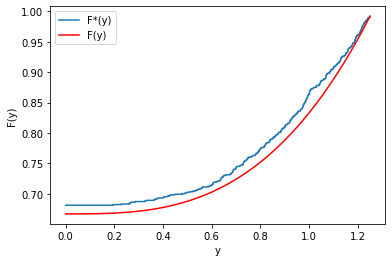

In [4]:
n = 1000
d = gen_sample(n)
plot_F(d)
F_y()
plt.show()

При **n = 30**

При **n = 100**

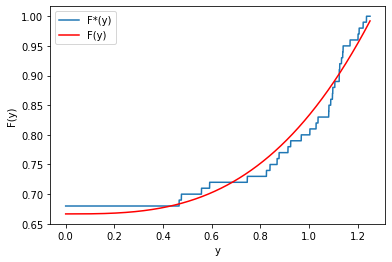

In [5]:
n = 100
d = gen_sample(n)
plot_F(d)
F_y()
plt.show()

**n = 500**

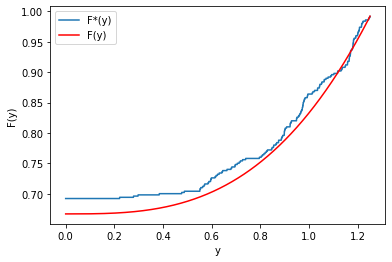

In [6]:
n = 500
d = gen_sample(n)
plot_F(d)
F_y()
plt.show()

**Вывод:**

Все в жизни хорошо.

## Задание №2
#### Статистический ряд. Построение гистограммы равноинтервальным методом.

Построим плотность распределения, данную в условии.

In [7]:
def f_y():
    y = np.arange(0, 1.25, 0.0001)
    f = np.array([elem ** 2 / 2 for elem in y])
    plt.plot(y, f, label='f(y)')
    plt.legend(loc='upper right')



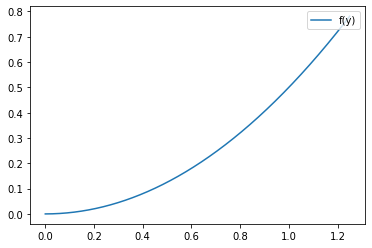

In [8]:
n = 1000
d = gen_sample(n)
d = [x for x in d if x > 0]
f_y()
plt.show()

Построение гистограммы равноинтервальным методом.

In [19]:
def histogram_equal_interval(sample):
    n = len(sample)
    segments = get_segments(n)
    plt.hist(sample, normed=True, bins=segments * 3)
    plt.ylabel('f*(y)')
    plt.xlabel('y')

In [ ]:
def get_borders_eq_interval(sample):
    n = len(sample)
    segments = get_segments(n)
    h = (sample[-1] - sample[0]) / segments
    borders = [sample[0]] + [i*h for i in range(1, segments)] + [sample[-1]]
    return borders
def get_num_in_borders(sample, borders):
    num = [0 for i in range(len(borders))]
    print("From:", "inf", "to:", borders[0], "num: ", num[0])
    for i in range(1, len(borders)):
        for y in sample:
            if borders[i - 1] <= y < borders[i]:
                num[i] += 1
        print("From:", borders[i - 1], "to:", borders[i], "num: ", num[i])
    return num

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


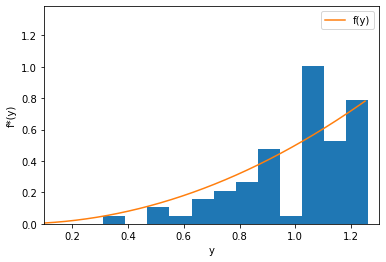

In [20]:
n = 240

d = gen_sample(n)
histogram_equal_interval(d)
f_y()
plt.xlim([0.1,1.3])
plt.show()

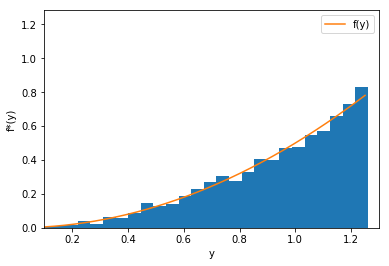

In [15]:
n = 10000

d = gen_sample(n)
histogram_equal_interval(d)
f_y()
plt.xlim([0.1,1.3])
plt.show()

**Вывод:**

Все в жизни прекрасно.

## Задание №3
#### Статистический ряд. Построение гистограммы равновероятностным методом.

Построение гистограммы равновероятностным методом

In [16]:
def histogram_equiprobable(sample):
    n = len(sample)
    segments = get_segments(n)
    v = n // segments
    borders = [sample[0]] + [(sample[i] + sample[i + 1]) / 2 for i in range(v - 1, n - 1, v)] + [sample[-1]]
    f, _y, eeeee = plt.hist(sample, normed=True, bins=borders)
    plt.ylabel('f*(y)')
    plt.xlabel('y')
    

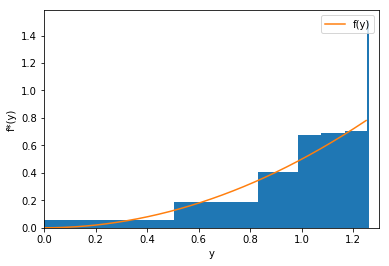

In [17]:
n = 1000


d = gen_sample(n)
histogram_equiprobable(d)
f_y()
plt.xlim([0,1.3])
plt.show()

In [113]:
import scipy.stats as sts
def  F_yy(y):
    return (y ** 3 + 4)/6
def chi2(sample, a):
    n = len(sample)
    m = get_segments(n)
    v = n // m
    borders = [sample[0]] + [(sample[i*v - 1] + sample[i*v]) / 2.0 for i in range(1, m)] + [sample[m*v-1]]
    print(borders)
    p = [float(v)/ n]*m
    p_t = [F_yy(borders[i]) - F_yy(borders[i - 1]) for i in range(1, len(borders))]
    chi_chi = n * sum([(p[i] - p_t[i])**2 / p_t[i] for i in range(len(p))])
    print(p)
    print(p_t)
    print(chi_chi)
    if chi_chi < sts.chi2.ppf(1 - a, m-1):
        print('Гипотеза принята')
    else:
        print('Гипотеза не принята')
    print('хи-квадртат: {chi}, табличный хи-квадрат: {table_chi}'.format(chi=chi_chi, table_chi=sts.chi2.ppf(1 - a, m-1)))

[-1.5873445900195564, -1.5350378219199574, -1.4411931120536583, -1.2466742209863768, -1.0914108506698812, -0.9280386373310674, -0.6675853151554249, 0.5971062327487986, 0.8670569055822575, 1.0780744539623646, 1.2585394996698354]
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
[0.06375007619137703, 0.1039434116158348, 0.17597256844033654, 0.10625210755430559, 0.08346427151243357, 0.08362595469279344, 0.08506877161499526, 0.07315881953114667, 0.10019057297990352, 0.12340697561343339]
7.732030055106723
Гипотеза принята
хи-квадртат: 7.732030055106723, табличный хи-квадрат: 21.66599433346192


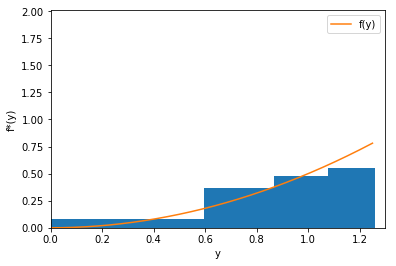

In [114]:
d = gen_sample(100)
histogram_equiprobable(d)
f_y()
chi2(d, 0.01)
plt.xlim([0,1.3])
plt.show()

In [115]:
def kolmg(sample, a):
    n = len(sample)
    d = max([abs(i / n - F_yy(sample[i])) for i in range(1, n)] + [abs((i - 1) / n - F_yy(sample[i])) for i in range(1,n)])
    d1 = [abs(F_yy(sample[i])- F(sample[i], sample)) for i in range(n)]
    print(d)
    print(max(d1))
    if 1.63 > math.sqrt(n)*d:
        print('Гипотеза принята')
    else:
        print('Гипотеза не принята')
    print(math.sqrt(n)*d)
def print_kolmg(sample):
    n = len(sample) 
    d = [abs(F_yy(sample[i])- F(sample[i], sample)) for i in range(n)]
    print(pd.DataFrame(data={'D': d, 'F(y)': [F_yy(sample[i]) for i in range(n)], 
                       'F*(y)': [F(sample[i], sample) for i in range(n)]}, index=range(1, n + 1)))
    print('Sum d:', round(max(d), 5))

0.03687088524178184
0.03687088524178184
Гипотеза принята
1.1659597671071869


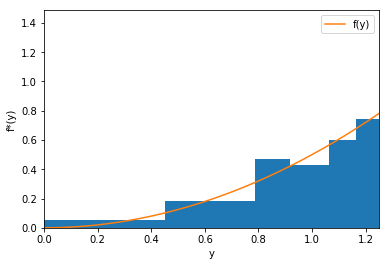

             D      F(y)  F*(y)
1     0.000268  0.000268  0.000
2     0.000611  0.000389  0.001
3     0.000369  0.001631  0.002
4     0.000081  0.002919  0.003
5     0.000875  0.003125  0.004
6     0.001693  0.003307  0.005
7     0.002027  0.003973  0.006
8     0.000207  0.006793  0.007
9     0.000750  0.008750  0.008
10    0.001258  0.010258  0.009
11    0.002675  0.012675  0.010
12    0.002265  0.013265  0.011
13    0.001962  0.013962  0.012
14    0.002293  0.015293  0.013
15    0.001606  0.015606  0.014
16    0.000754  0.015754  0.015
17    0.000400  0.016400  0.016
18    0.000054  0.017054  0.017
19    0.000431  0.017569  0.018
20    0.000878  0.018122  0.019
21    0.001780  0.018220  0.020
22    0.000315  0.020685  0.021
23    0.000034  0.022034  0.022
24    0.000566  0.022434  0.023
25    0.001547  0.022453  0.024
26    0.001909  0.023091  0.025
27    0.000628  0.026628  0.026
28    0.001149  0.028149  0.027
29    0.000590  0.028590  0.028
30    0.000394  0.028606  0.029
...     

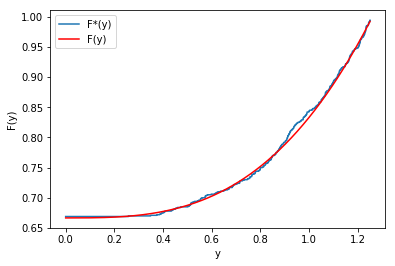

In [116]:
d = gen_sample(1000)
histogram_equiprobable(d)
f_y()
kolmg(d, 0.05)
plt.xlim([0,1.25])
plt.show()
print_kolmg(d)
plot_F(d)
F_y()
plt.show()

In [117]:
def mizes(sample):
    n = len(sample) 
    d = [(F_yy(sample[i])- F(sample[i], sample))**2 for i in range(n)]
    if 2.0 > (1.0/(12*n) + sum(d)):
        print('Гипотеза принята')
    else:
        print('Гипотеза не принята')
    print((1.0/(12*n) + sum(d)))
def print_mizes(sample):
    n = len(sample) 
    d = [(F_yy(sample[i])- F(sample[i], sample))**2 for i in range(n)]
    print(pd.DataFrame(data={'D': d, 'F(y)': [F_yy(sample[i]) for i in range(n)], 
                       'F*(y)': [F(sample[i], sample) for i in range(n)]}, index=range(1, n + 1)))
    print('Sum d:', 1/ (12*n) + round(sum(d), 5))

Гипотеза принята
0.03750504080349847


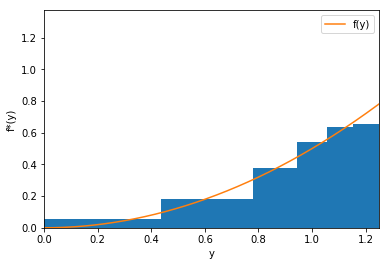

                 D      F(y)  F*(y)
1     2.762824e-06  0.001662  0.000
2     1.648652e-06  0.002284  0.001
3     1.098136e-06  0.003048  0.002
4     5.991145e-07  0.003774  0.003
5     1.131383e-05  0.007364  0.004
6     5.589960e-06  0.007364  0.005
7     1.958563e-06  0.007399  0.006
8     1.424619e-06  0.008194  0.007
9     1.465947e-07  0.008383  0.008
10    3.960733e-07  0.009629  0.009
11    1.257769e-06  0.011122  0.010
12    4.625790e-06  0.013151  0.011
13    8.728916e-06  0.014954  0.012
14    5.313216e-06  0.015305  0.013
15    2.417343e-06  0.015555  0.014
16    6.348272e-06  0.017520  0.015
17    5.113610e-06  0.018261  0.016
18    1.204020e-05  0.020470  0.017
19    1.096098e-05  0.021311  0.018
20    1.169821e-05  0.022420  0.019
21    7.129673e-06  0.022670  0.020
22    3.774564e-06  0.022943  0.021
23    8.327544e-06  0.024886  0.022
24    4.610493e-06  0.025147  0.023
25    1.018470e-05  0.027191  0.024
26    2.709781e-05  0.030206  0.025
27    3.188996e-05  0.031647

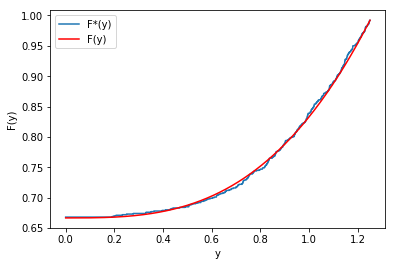

In [118]:
d = gen_sample(1000)
histogram_equiprobable(d)
f_y()
mizes(d)
plt.xlim([0,1.25])
plt.show()
print_mizes(d)
plot_F(d)
F_y()
plt.show()

### Доверительный интервал для матожидания

In [122]:
def math_interval(sample, a, flg=False):
    n = len(sample)
    M_n = sum(sample) / n
    if flg:
        D_n = sum([(M_n - y) ** 2 for y in sample]) / (n - 1)
    else:
        D_n = 1.05
    #Квантиль нормального распределения уровня (1-a/2)
    u = sts.norm.ppf(1 - a/2)
    print('m(x): ({first}, {second})'.format(first=(M_n - math.sqrt(D_n/(n-1))*u),
                                           second=(M_n + math.sqrt(D_n/(n-1))*u)))

#### Построим доверительный интервал для матожидания для раазных уровней значимости


In [123]:
n = 20
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_sample(n)
for _a in a:
    print('a = {}, unknowable D:'.format(_a))
    math_interval(sample, _a)
    print('a = {}, knowable D:'.format(_a))
    math_interval(sample, _a, True)
    print('\n'*2)

a = 0.5, unknowable D:
m(x): (-0.5352545764462004, -0.21813489315344886)
a = 0.5, knowable D:
m(x): (-0.5603009796749717, -0.1930884899246775)



a = 0.1, unknowable D:
m(x): (-0.763368854821771, 0.009979385222121662)
a = 0.1, knowable D:
m(x): (-0.8244486075992699, 0.07105913799962055)



a = 0.01, unknowable D:
m(x): (-0.9822237089022107, 0.22883423930256142)
a = 0.01, knowable D:
m(x): (-1.0778741755941297, 0.3244847059944804)



a = 0.001, unknowable D:
m(x): (-1.1502356185965745, 0.3968461489969253)
a = 0.001, knowable D:
m(x): (-1.272425554511892, 0.519036084912243)





#### 4. Построим график доверительного интервала от уровня значимости

In [92]:
def plot_h_a(sample, flg=False):
    s=''
    n = len(sample)
    if not flg:
        M_n = sum(sample) / n
        D = sum([(M_n - y)**2 for y in sample]) / (n-1)
        s = 'use D_n'
    else:
        D = 1.05
        s = 'use D'
    a = np.arange(0,1,0.001)
    h = [2*math.sqrt(D/(n-1))*sts.norm.ppf(1 - x/2.0) for x in a]
    plt.plot(a,h, label=s)
    plt.ylabel('$h(a)$')
    plt.xlabel('$a$')
    plt.legend()

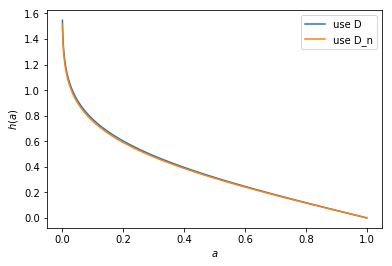

In [93]:
n = 20
sample = gen_sample(n)
plot_h_a(sample, True)
plot_h_a(sample)
plt.show()

При n=30

a = 0.5, unknowable D:
m(x): (-0.36989656052522335, -0.11321125896316064)
a = 0.5, knowable D:
m(x): (-0.38187589574470493, -0.10123192374367906)



a = 0.1, unknowable D:
m(x): (-0.5545384652075998, 0.07143064571921581)
a = 0.1, knowable D:
m(x): (-0.5837520343960174, 0.10064421490763348)



a = 0.01, unknowable D:
m(x): (-0.7316855398850768, 0.24857772039669285)
a = 0.01, knowable D:
m(x): (-0.7774337854090535, 0.2943259659206695)



a = 0.001, unknowable D:
m(x): (-0.867678951767062, 0.384571132278678)
a = 0.001, knowable D:
m(x): (-0.9261206445485275, 0.4430128250601435)





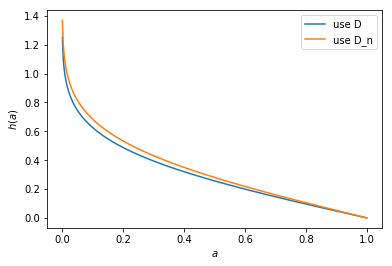

In [94]:
n = 30
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_sample(n)
for _a in a:
    print('a = {}, unknowable D:'.format(_a))
    math_interval(sample, _a)
    print('a = {}, knowable D:'.format(_a))
    math_interval(sample, _a, True)
    print('\n'*2)
plot_h_a(sample, True)
plot_h_a(sample)
plt.show()

При n=50

a = 0.5, unknowable D:
m(x): (-0.5372202516085884, -0.3397498726827702)
a = 0.5, knowable D:
m(x): (-0.5404799529268753, -0.33649017136448317)



a = 0.1, unknowable D:
m(x): (-0.6792669783254195, -0.1977031459659391)
a = 0.1, knowable D:
m(x): (-0.6872162933959659, -0.18975383089539263)



a = 0.01, unknowable D:
m(x): (-0.8155478629311306, -0.06142226136022805)
a = 0.01, knowable D:
m(x): (-0.8279964348686872, -0.04897368942267133)



a = 0.001, unknowable D:
m(x): (-0.9201688537409896, 0.043198729449631046)
a = 0.001, knowable D:
m(x): (-0.9360714442864866, 0.059101319995127966)





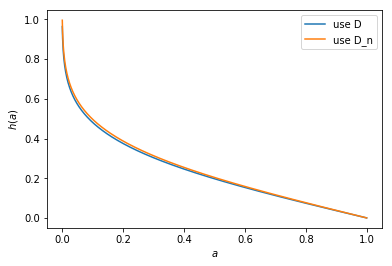

In [95]:
n = 50
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_sample(n)
for _a in a:
    print('a = {}, unknowable D:'.format(_a))
    math_interval(sample, _a)
    print('a = {}, knowable D:'.format(_a))
    math_interval(sample, _a, True)
    print('\n'*2)
plot_h_a(sample, True)
plot_h_a(sample)
plt.show()

При n=70

a = 0.5, unknowable D:
m(x): (-0.39687356718989386, -0.2304650870068108)
a = 0.5, knowable D:
m(x): (-0.403325058350401, -0.22401359584630365)



a = 0.1, unknowable D:
m(x): (-0.5165764818068217, -0.11076217238988298)
a = 0.1, knowable D:
m(x): (-0.5323094987007337, -0.09502915549597085)



a = 0.01, unknowable D:
m(x): (-0.6314205156746142, 0.004081861477909565)
a = 0.01, knowable D:
m(x): (-0.6560583103601376, 0.028719656163432916)



a = 0.001, unknowable D:
m(x): (-0.7195847262798774, 0.0922460720831727)
a = 0.001, knowable D:
m(x): (-0.7510585983668308, 0.12371994417012605)





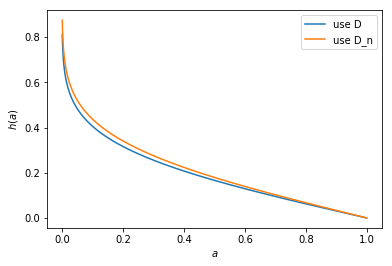

In [96]:
n = 70
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_sample(n)
for _a in a:
    print('a = {}, unknowable D:'.format(_a))
    math_interval(sample, _a)
    print('a = {}, knowable D:'.format(_a))
    math_interval(sample, _a, True)
    print('\n'*2)
plot_h_a(sample, True)
plot_h_a(sample)
plt.show()

При n=100

a = 0.5, unknowable D:
m(x): (-0.4831166746066961, -0.47874545957581166)
a = 0.5, knowable D:
m(x): (-0.4831618401442873, -0.47870029403822045)



a = 0.1, unknowable D:
m(x): (-0.48626102866268245, -0.4756011055198253)
a = 0.1, knowable D:
m(x): (-0.48637117221682613, -0.47549096196568164)



a = 0.01, unknowable D:
m(x): (-0.48927774972460186, -0.4725843844579059)
a = 0.01, knowable D:
m(x): (-0.4894502337619117, -0.47241190042059605)



a = 0.001, unknowable D:
m(x): (-0.49159364565826935, -0.4702684885242384)
a = 0.001, knowable D:
m(x): (-0.4918139876408463, -0.4700481465416615)





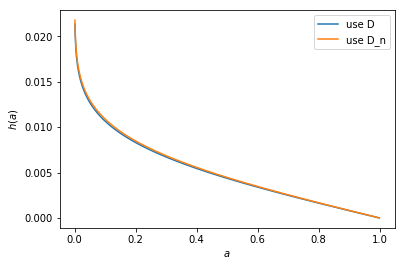

In [97]:
n = 100000
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_sample(n)
for _a in a:
    print('a = {}, unknowable D:'.format(_a))
    math_interval(sample, _a)
    print('a = {}, knowable D:'.format(_a))
    math_interval(sample, _a, True)
    print('\n'*2)
plot_h_a(sample, True)
plot_h_a(sample)
plt.show()

При n=150

a = 0.5, unknowable D:
m(x): (-0.6064368101168465, -0.49319498367573195)
a = 0.5, knowable D:
m(x): (-0.6062501737674085, -0.4933816200251699)



a = 0.1, unknowable D:
m(x): (-0.6878952590290174, -0.411736534763561)
a = 0.1, knowable D:
m(x): (-0.687440115750406, -0.4121916780421723)



a = 0.01, unknowable D:
m(x): (-0.7660472146069166, -0.3335845791856617)
a = 0.01, knowable D:
m(x): (-0.7653344634081773, -0.33429733038440107)



a = 0.001, unknowable D:
m(x): (-0.8260434132663528, -0.27358838052622564)
a = 0.001, knowable D:
m(x): (-0.8251328999535631, -0.27449889383901527)





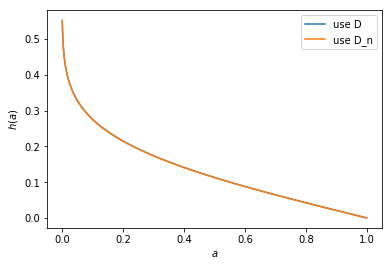

In [98]:
n = 150
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_sample(n)
for _a in a:
    print('a = {}, unknowable D:'.format(_a))
    math_interval(sample, _a)
    print('a = {}, knowable D:'.format(_a))
    math_interval(sample, _a, True)
    print('\n'*2)
plot_h_a(sample, True)
plot_h_a(sample)
plt.show()

#### Построим график зависимости доверительного интервала от объема выборки

In [100]:
def plot_h_n(a):
    D = 1.05
    n = np.arange(2,1000,1)
    h = [2*math.sqrt(D / (x-1))*sts.norm.ppf(1 - a/2.0) for x in n]
    plt.plot(n, h)
    plt.ylabel('$h(n)$')
    plt.xlabel('$n$')

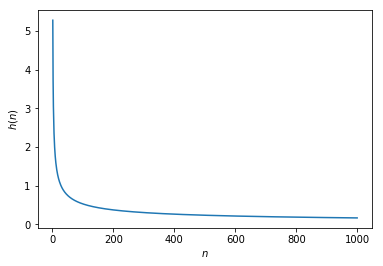

In [101]:
plot_h_n(0.01)
plt.show()

### Доверительный интервал для дисперсии 

In [124]:
def d_interval(sample, a, flg=False):
    n = len(sample)
    if not flg:
        X_n = sum(sample) / n
    else:
        X_n = -0.48 
    D_n = sum([(X_n - y)**2 for y in sample]) / (n-1)
    #Chi2
    print (D_n*(n-1)/sts.chi2.ppf(1-a/2, n-1), D_n*(n-1)/sts.chi2.ppf(a/2, n-1))
    

In [125]:
n = 20
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_sample(n)
for _a in a:
    print('a = {}, unknown M(x):'.format(_a))
    d_interval(sample, _a)
    print('\na = {}, known M(x):'.format(_a))
    d_interval(sample, _a, True)
    print('\n'*2)

a = 0.5, unknown M(x):
1.03567761425 1.61573473225

a = 0.5, known M(x):
1.17748601379 1.83696646818



a = 0.1, unknown M(x):
0.780543157053 2.32561960149

a = 0.1, known M(x):
0.887417704066 2.64405111829



a = 0.01, unknown M(x):
0.609822389634 3.43781736631

a = 0.01, known M(x):
0.693321285322 3.9085346744



a = 0.001, unknown M(x):
0.511784366887 4.78963657876

a = 0.001, known M(x):
0.581859572703 5.44544943816





#### Построим график зависимости величины доверительного интервала от уровня значимости 

In [126]:
def plot_h_a_d(sample, flg=False):
    s=''
    n = len(sample)
    if not flg:
        X_n = sum(sample) / n
        s = 'use M_n'
    else:
        X_n = -0.48
        s = 'use m'
    a = np.arange(0.001,1,0.001)
    D_n = sum([(X_n - y)**2 for y in sample]) / (n-1)
    h = [D_n*(n-1)/sts.chi2.ppf(x/2, n-1) - D_n*(n-1)/sts.chi2.ppf(1-x/2, n-1) for x in a]
    plt.plot(a,h, label=s)
    plt.ylabel('$h(a)$')
    plt.xlabel('$a$')
    plt.legend()

При n=20

a = 0.5, unknown M(x):
0.632927665902 0.987414615058

a = 0.5, known M(x):
0.63699291691 0.993756711438



a = 0.1, unknown M(x):
0.477008821792 1.42124244639

a = 0.1, known M(x):
0.480072616753 1.43037098919



a = 0.01, unknown M(x):
0.37267722733 2.10093342901

a = 0.01, known M(x):
0.375070907612 2.1144275804



a = 0.001, unknown M(x):
0.312763817932 2.92706288

a = 0.001, known M(x):
0.314772678492 2.94586320421





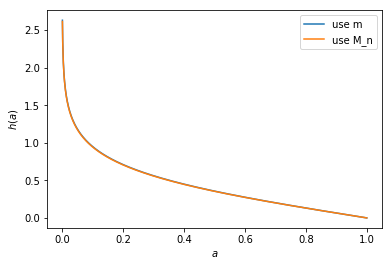

In [127]:
n = 20
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_sample(n)
for _a in a:
    print('a = {}, unknown M(x):'.format(_a))
    d_interval(sample, _a)
    print('\na = {}, known M(x):'.format(_a))
    d_interval(sample, _a, True)
    print('\n'*2)
plot_h_a_d(sample, True)
plot_h_a_d(sample)
plt.show()

При n=30

a = 0.5, unknown M(x):
1.02690156693 1.09081244343

a = 0.5, known M(x):
1.02751583055 1.09146493674



a = 0.1, unknown M(x):
0.98398696648 1.1400980449

a = 0.1, known M(x):
0.984575559792 1.14078001946



a = 0.01, unknown M(x):
0.945039267822 1.19020416818

a = 0.01, known M(x):
0.945604563716 1.19091611482



a = 0.001, unknown M(x):
0.916529127518 1.23067008073

a = 0.001, known M(x):
0.917077369448 1.23140623294





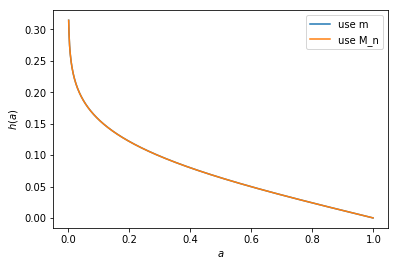

In [128]:
n = 1000
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_sample(n)
for _a in a:
    print('a = {}, unknown M(x):'.format(_a))
    d_interval(sample, _a)
    print('\na = {}, known M(x):'.format(_a))
    d_interval(sample, _a, True)
    print('\n'*2)
plot_h_a_d(sample, True)
plot_h_a_d(sample)
plt.show()

При n=50

a = 0.5, unknown M(x):
1.0401933529 1.36839068875

a = 0.5, known M(x):
1.04061167328 1.36894099577



a = 0.1, unknown M(x):
0.866563311064 1.69425645193

a = 0.1, known M(x):
0.866911805015 1.69493780795



a = 0.01, unknown M(x):
0.734834703868 2.10965183291

a = 0.01, known M(x):
0.73513022232 2.11050024282



a = 0.001, unknown M(x):
0.651550480048 2.5225295718

a = 0.001, known M(x):
0.65181250522 2.52354402312





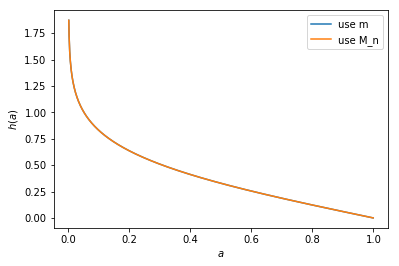

In [129]:
n = 50
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_sample(n)
for _a in a:
    print('a = {}, unknown M(x):'.format(_a))
    d_interval(sample, _a)
    print('\na = {}, known M(x):'.format(_a))
    d_interval(sample, _a, True)
    print('\n'*2)
plot_h_a_d(sample, True)
plot_h_a_d(sample)
plt.show()

При n=70

a = 0.5, unknown M(x):
1.02403984424 1.28973032895

a = 0.5, known M(x):
1.02500729611 1.29094878937



a = 0.1, unknown M(x):
0.87658135615 1.54009102455

a = 0.1, known M(x):
0.877409498021 1.54154601085



a = 0.01, unknown M(x):
0.760791750753 1.84401398298

a = 0.01, known M(x):
0.761510501498 1.84575609759



a = 0.001, unknown M(x):
0.685558802525 2.13248696546

a = 0.001, known M(x):
0.686206477661 2.13450161217





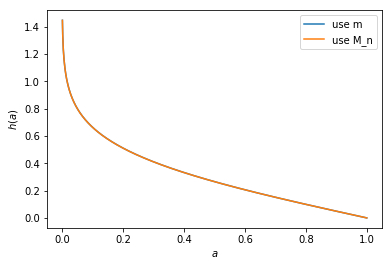

In [130]:
n = 70
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_sample(n)
for _a in a:
    print('a = {}, unknown M(x):'.format(_a))
    d_interval(sample, _a)
    print('\na = {}, known M(x):'.format(_a))
    d_interval(sample, _a, True)
    print('\n'*2)
plot_h_a_d(sample, True)
plot_h_a_d(sample)
plt.show()

При n=100

a = 0.5, unknown M(x):
0.938638434082 1.13768900162

a = 0.5, known M(x):
0.941183641296 1.14077395335



a = 0.1, unknown M(x):
0.823374352807 1.31687628092

a = 0.1, known M(x):
0.825607010523 1.32044711596



a = 0.01, unknown M(x):
0.730000971635 1.52548979592

a = 0.01, known M(x):
0.731980438565 1.52962630631



a = 0.001, unknown M(x):
0.667793117219 1.71594108348

a = 0.001, known M(x):
0.669603901646 1.72059402061





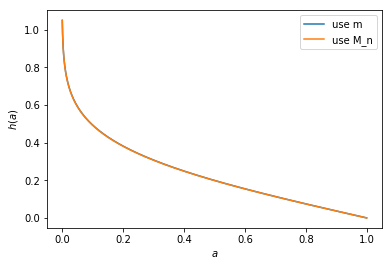

In [131]:
n = 100
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_sample(n)
for _a in a:
    print('a = {}, unknown M(x):'.format(_a))
    d_interval(sample, _a)
    print('\na = {}, known M(x):'.format(_a))
    d_interval(sample, _a, True)
    print('\n'*2)
plot_h_a_d(sample, True)
plot_h_a_d(sample)
plt.show()

При n=150

a = 0.5, unknown M(x):
1.074843087 1.25706751649

a = 0.5, known M(x):
1.08191130495 1.26533405074



a = 0.1, unknown M(x):
0.965041983985 1.4143200369

a = 0.1, known M(x):
0.971388144799 1.42362067102



a = 0.01, unknown M(x):
0.873408146875 1.59058049137

a = 0.01, known M(x):
0.879151719329 1.6010402224



a = 0.001, unknown M(x):
0.81086145734 1.74598081194

a = 0.001, known M(x):
0.816193719864 1.75746246268





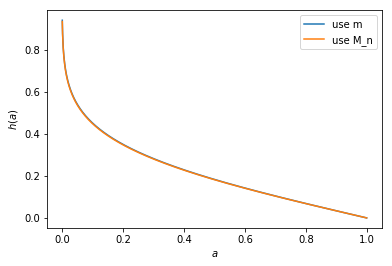

In [110]:
n = 150
a = [0.5, 0.1, 0.01, 0.001]
sample = gen_sample(n)
for _a in a:
    print('a = {}, unknown M(x):'.format(_a))
    d_interval(sample, _a)
    print('\na = {}, known M(x):'.format(_a))
    d_interval(sample, _a, True)
    print('\n'*2)
plot_h_a_d(sample, True)
plot_h_a_d(sample)
plt.show()

#### Построим график зависимости величины доверительного интервала от объема выборки

In [111]:
def plot_h_n_d(a):
    X_n = -0.48
    n = np.arange(5,150,1)
    h = []
    for _n in n:
        sample = gen_sample(_n)
        D_n = sum([(x - X_n)**2 for x in sample]) / (_n-1)
        h.append(D_n*(_n-1)/sts.chi2.ppf(a/2, _n-1) - D_n*(_n-1)/sts.chi2.ppf(1-a/2, _n-1))
    #plt.plot(n, h2, 'r')
    #plt.plot(n, h1, 'b')
    plt.plot(n, h, label='chi2')
    plt.ylabel('$h(n)$')
    plt.xlabel('$n$')
    plt.legend()

####  Построить графики зависимости величины доверительного интервала от объема выборки

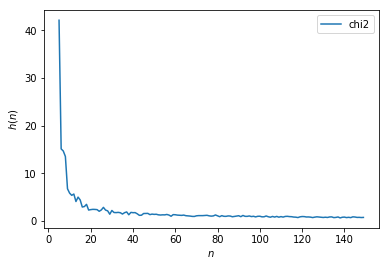

In [112]:
plot_h_n_d(0.01)
plt.show()